In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample



In [22]:
df = pd.read_json("train.json")
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [23]:

# Count the number of instances for each class in 'interest_level'
interest_counts = df['interest_level'].value_counts()
print("Class Distribution for 'interest_level':")
print(interest_counts)

Class Distribution for 'interest_level':
interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64


<ipython-input-24-6f8f09000a61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interest_counts.index, y=interest_counts.values, palette='viridis')


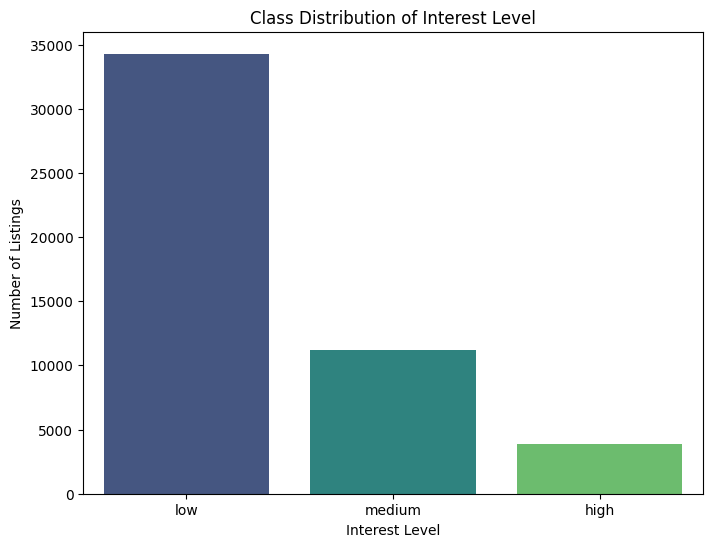

In [24]:
# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=interest_counts.index, y=interest_counts.values, palette='viridis')
plt.xlabel('Interest Level')
plt.ylabel('Number of Listings')
plt.title('Class Distribution of Interest Level')
plt.show()

In [25]:
# Imbalance Ratio
imbalance_ratio = interest_counts.max() / interest_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 8.93


The dataset is imbalanced.
Balanced Class Distribution for 'interest_level':
interest_level
medium    34284
low       34284
high      34284
Name: count, dtype: int64


<ipython-input-19-8d94d6dd7b04>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette='viridis')


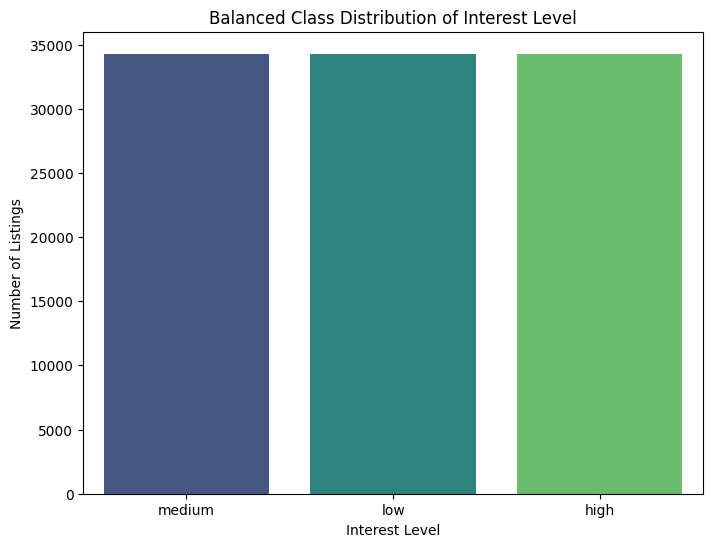

In [19]:
# Analyze if the data is imbalanced
if imbalance_ratio > 1.5:
    print("The dataset is imbalanced.") #printing imbalace ratio which shows dataframe is highly imbalanced

    # Separate each class into different DataFrames
    df_low = df[df['interest_level'] == 'low']
    df_medium = df[df['interest_level'] == 'medium']
    df_high = df[df['interest_level'] == 'high']

    # Upsample minority classes
    df_medium_upsampled = resample(df_medium,
                                   replace=True,    # Sample with replacement
                                   n_samples=len(df_low), # Match number of samples in majority class
                                   random_state=42) # Reproducible results
    df_high_upsampled = resample(df_high,
                                 replace=True,
                                 n_samples=len(df_low),
                                 random_state=42)

    # Combining the 3 dataframes into one
    df_balanced = pd.concat([df_low, df_medium_upsampled, df_high_upsampled])

    # Shuffling the balanced dataset to make it balanced
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # Display the new class distribution
    balanced_counts = df_balanced['interest_level'].value_counts()
    print("Balanced Class Distribution for 'interest_level':")
    print(balanced_counts)

    # Plot the new class distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette='viridis')
    plt.xlabel('Interest Level')
    plt.ylabel('Number of Listings')
    plt.title('Balanced Class Distribution of Interest Level')
    plt.show()
else:
    print("The dataset is balanced.")
